<a href="https://colab.research.google.com/github/ebinjosephx/project/blob/main/1d_CNN_autotuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 8.1 MB/s 


In [2]:
from keras_tuner.tuners import RandomSearch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report

from keras.utils.np_utils import to_categorical

dataset = pd.read_excel('/content/Copy of Pro-data4.xlsx')
sc = StandardScaler()
X = dataset.iloc[:,1:6].values
X = pd.DataFrame(sc.fit_transform(X))

y = dataset.iloc[:,-1]

y_cat= to_categorical(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.3, random_state = 42)




In [3]:
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

def build_model(hp):
    
    filter_num = hp.Int('filters', min_value=50, max_value=150, step=1)
    act_func = hp.Choice('Activation Func', ['relu', 'elu', 'sigmoid', 'tanh'])

    model = Sequential()
    model.add(Conv1D(filters=filter_num, kernel_size=3, activation=act_fn, input_shape=(X_train.shape[1],X_train.shape[2]),kernel_regularizer=keras.regularizers.l2(l=0.01), kernel_initializer='he_normal'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [5]:
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    seed=1,
    max_trials=16,
    executions_per_trial=2,
    directory='dir',
    project_name='set6')

In [6]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
filters (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 150, 'step': 1, 'sampling': None}


In [7]:
tuner.search(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test), batch_size=32)

Trial 16 Complete [00h 00m 06s]
accuracy: 0.5385321080684662

Best accuracy So Far: 0.5477064251899719
Total elapsed time: 00h 01m 45s
INFO:tensorflow:Oracle triggered exit


In [8]:
tuner.results_summary()

Results summary
Results in dir/set6
Showing 10 best trials
Trial summary
Hyperparameters:
filters: 97
Score: 0.5477064251899719
Trial summary
Hyperparameters:
filters: 96
Score: 0.5458715558052063
Trial summary
Hyperparameters:
filters: 129
Score: 0.5449541211128235
Trial summary
Hyperparameters:
filters: 61
Score: 0.5440366864204407
Trial summary
Hyperparameters:
filters: 112
Score: 0.5431192517280579
Trial summary
Hyperparameters:
filters: 147
Score: 0.5422018468379974
Trial summary
Hyperparameters:
filters: 76
Score: 0.542201817035675
Trial summary
Hyperparameters:
filters: 74
Score: 0.5412844121456146
Trial summary
Hyperparameters:
filters: 107
Score: 0.5403669774532318
Trial summary
Hyperparameters:
filters: 86
Score: 0.5403669476509094


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2]),kernel_regularizer=keras.regularizers.l2(l=0.01), kernel_initializer='he_normal'))
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(X_train, y_train, epochs=150,validation_data=(X_test, y_test), verbose=1)


Epoch 1/150
18/18 [==============================] - 2s 46ms/step - loss: 3.7711 - accuracy: 0.3945 - val_loss: 3.5459 - val_accuracy: 0.4744
Epoch 2/150
18/18 [==============================] - 0s 7ms/step - loss: 3.5959 - accuracy: 0.4679 - val_loss: 3.4030 - val_accuracy: 0.5598
Epoch 3/150
18/18 [==============================] - 0s 10ms/step - loss: 3.5145 - accuracy: 0.4477 - val_loss: 3.3059 - val_accuracy: 0.5769
Epoch 4/150
18/18 [==============================] - 0s 9ms/step - loss: 3.4243 - accuracy: 0.4936 - val_loss: 3.2400 - val_accuracy: 0.4915
Epoch 5/150
18/18 [==============================] - 0s 7ms/step - loss: 3.3588 - accuracy: 0.4459 - val_loss: 3.1705 - val_accuracy: 0.5598
Epoch 6/150
18/18 [==============================] - 0s 13ms/step - loss: 3.2802 - accuracy: 0.4917 - val_loss: 3.1429 - val_accuracy: 0.5299
Epoch 7/150
18/18 [==============================] - 0s 8ms/step - loss: 3.2257 - accuracy: 0.4569 - val_loss: 3.0224 - val_accuracy: 0.5513
Epoch 8/15

              precision    recall  f1-score   support

           0       0.57      0.92      0.70        72
           1       0.44      0.16      0.23        51
           2       0.62      0.49      0.55        67
           3       0.72      0.77      0.75        44

    accuracy                           0.60       234
   macro avg       0.59      0.58      0.56       234
weighted avg       0.59      0.60      0.56       234



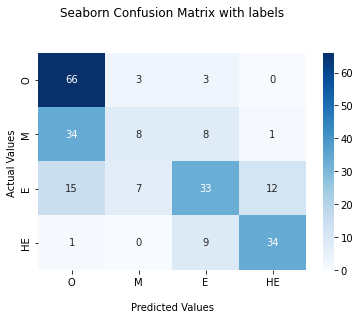

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)
cf=confusion_matrix(y_test_class, y_pred_class)

from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['O','M','E','HE'])
ax.yaxis.set_ticklabels(['O','M','E','HE'])

## Display the visualization of the Confusion Matrix.
plt.show()


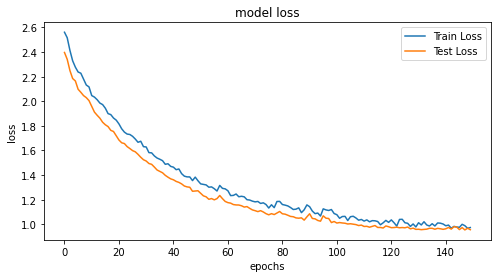

In [11]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()